# Road Traffic Severity Classification
#### **Description** : This data set is collected from Addis Ababa Sub-city police departments for master's research work. The data set has been prepared from manual records of road traffic accidents of the year 2017-20. All the sensitive information has been excluded during data encoding and finally it has 32 features and 12316 instances of the accident. Then it is preprocessed and for identification of major causes of the accident by analyzing it using different machine learning classification algorithms. 

#### **Problem Statement**: The target feature is Accident_severity which is a multi-class variable. The task is to classify this variable based on the other 31 features step-by-step by going through each day's task. Metric for evaluation will be f1-score

##Importing Libraries

In [1]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from collections import Counter
from imblearn.over_sampling import SMOTE


from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
!pip install --quiet shap==0.39.0
import shap
sns.set()

     |████████████████████████████████| 356 kB 5.2 MB/s 


In [109]:
!python --version
!joblib --version

Python 3.7.13
/bin/bash: joblib: command not found


In [115]:
import joblib as jl
import sklearn as sl
import scipy as scp

In [116]:
print(f"numpy=={np.__version__}")
print(f"joblib=={jl.__version__}")
print(f"pandas=={pd.__version__}")
print(f"scikit-learn=={sl.__version__}")
print(f"scipy=={scp.__version__}")

numpy==1.21.6
joblib==1.1.0
pandas==1.3.5
scikit-learn==1.0.2
scipy==1.7.3


In [2]:
dataset=pd.read_csv("/content/drive/MyDrive/Road_Traffic_Severity_Classification/Dataset/RTA Dataset.csv")

### Basic EDA

In [3]:
dataset.head()

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   
2            Owner                     NaN  ...   Going straight   
3     Governmental                     NaN  ...   Going straight   
4            Owner                 5-10yrs  ...   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4               NaN                  NaN    Not a Pedestrian   

            Cause_of_accident Accident_severity  
0             Moving Backward     Slight Injury  
1                  Overtaking     Slight Injury  
2   Changing lane to the left    Serious Injury  
3  Changing lane to the right     Slight Injury  
4                  Overtaking     Slight Injury  

[5 rows x 32 columns]

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [5]:
dataset.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [6]:
#converting Time column to Datetime object
dataset['Time']=pd.to_datetime(dataset['Time'])

In [7]:
#Checking the shape
dataset.shape

(12316, 32)


Shape of the dataset:- 32 columns(features) and 12316 rows.

In [8]:
#Getting the list of objects
dataset.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [9]:
dataset.describe(include='O').T

count unique  \
Day_of_week              12316      7   
Age_band_of_driver       12316      5   
Sex_of_driver            12316      3   
Educational_level        11575      7   
Vehicle_driver_relation  11737      4   
Driving_experience       11487      7   
Type_of_vehicle          11366     17   
Owner_of_vehicle         11834      4   
Service_year_of_vehicle   8388      6   
Defect_of_vehicle         7889      3   
Area_accident_occured    12077     14   
Lanes_or_Medians         11931      7   
Road_allignment          12174      9   
Types_of_Junction        11429      8   
Road_surface_type        12144      5   
Road_surface_conditions  12316      4   
Light_conditions         12316      4   
Weather_conditions       12316      9   
Type_of_collision        12161     10   
Vehicle_movement         12008     13   
Casualty_class           12316      4   
Sex_of_casualty          12316      3   
Age_band_of_casualty     12316      6   
Casualty_severity        12316      4   
Work_of_casuality         9118      7   
Fitness_of_casuality      9681      5   
Pedestrian_movement      12316      9   
Cause_of_accident        12316     20   
Accident_severity        12316      3   

                                                                      top  \
Day_of_week                                                        Friday   
Age_band_of_driver                                                  18-30   
Sex_of_driver                                                        Male   
Educational_level                                      Junior high school   
Vehicle_driver_relation                                          Employee   
Driving_experience                                                 5-10yr   
Type_of_vehicle                                                Automobile   
Owner_of_vehicle                                                    Owner   
Service_year_of_vehicle                                           Unknown   
Defect_of_vehicle                                               No defect   
Area_accident_occured                                               Other   
Lanes_or_Medians         Two-way (divided with broken lines road marking)   
Road_allignment                            Tangent road with flat terrain   
Types_of_Junction                                                 Y Shape   
Road_surface_type                                           Asphalt roads   
Road_surface_conditions                                               Dry   
Light_conditions                                                 Daylight   
Weather_conditions                                                 Normal   
Type_of_collision                          Vehicle with vehicle collision   
Vehicle_movement                                           Going straight   
Casualty_class                                            Driver or rider   
Sex_of_casualty                                                      Male   
Age_band_of_casualty                                                   na   
Casualty_severity                                                       3   
Work_of_casuality                                                  Driver   
Fitness_of_casuality                                               Normal   
Pedestrian_movement                                      Not a Pedestrian   
Cause_of_accident                                           No distancing   
Accident_severity                                           Slight Injury   

                          freq  
Day_of_week               2041  
Age_band_of_driver        4271  
Sex_of_driver            11437  
Educational_level         7619  
Vehicle_driver_relation   9627  
Driving_experience        3363  
Type_of_vehicle           3205  
Owner_of_vehicle         10459  
Service_year_of_vehicle   2883  
Defect_of_vehicle         7777  
Area_accident_occured     3819  
Lanes_or_Medians          4411  
Road_allignment          10459  
Types_of_Junction    

We can see almost all columns are of object data types. Therefore we need to find ways to deal with categorical datas and do their EDA.
Before doing that let's check for any missing, if it exists.

In [10]:
#checking if there is any any NULL or Not
dataset.isnull().any()

Time                           False
Day_of_week                    False
Age_band_of_driver             False
Sex_of_driver                  False
Educational_level               True
Vehicle_driver_relation         True
Driving_experience              True
Type_of_vehicle                 True
Owner_of_vehicle                True
Service_year_of_vehicle         True
Defect_of_vehicle               True
Area_accident_occured           True
Lanes_or_Medians                True
Road_allignment                 True
Types_of_Junction               True
Road_surface_type               True
Road_surface_conditions        False
Light_conditions               False
Weather_conditions             False
Type_of_collision               True
Number_of_vehicles_involved    False
Number_of_casualties           False
Vehicle_movement                True
Casualty_class                 False
Sex_of_casualty                False
Age_band_of_casualty           False
Casualty_severity              False
W

In [11]:
#Counting the null
dataset.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [12]:
print("Number of duplicates: ",dataset.duplicated().sum())
print("Unique values per column: ")
dataset.nunique()

Number of duplicates:  0
Unique values per column: 


Time                           1074
Day_of_week                       7
Age_band_of_driver                5
Sex_of_driver                     3
Educational_level                 7
Vehicle_driver_relation           4
Driving_experience                7
Type_of_vehicle                  17
Owner_of_vehicle                  4
Service_year_of_vehicle           6
Defect_of_vehicle                 3
Area_accident_occured            14
Lanes_or_Medians                  7
Road_allignment                   9
Types_of_Junction                 8
Road_surface_type                 5
Road_surface_conditions           4
Light_conditions                  4
Weather_conditions                9
Type_of_collision                10
Number_of_vehicles_involved       6
Number_of_casualties              8
Vehicle_movement                 13
Casualty_class                    4
Sex_of_casualty                   3
Age_band_of_casualty              6
Casualty_severity                 4
Work_of_casuality           

We can summarize the table as:

1. Number of observations: 12316
2. Number of columns: 32
3. Memory Usage: 3.0+ MB
4. Number of int columns: 2
4. Number of object columns: 30
5. Number of columns with missing values: 16

In [13]:
#Getting the description of Numerical Columns
dataset.describe()

Number_of_vehicles_involved  Number_of_casualties
count                 12316.000000          12316.000000
mean                      2.040679              1.548149
std                       0.688790              1.007179
min                       1.000000              1.000000
25%                       2.000000              1.000000
50%                       2.000000              1.000000
75%                       2.000000              2.000000
max                       7.000000              8.000000

In [14]:
#Getting the description of Categorical Columns
dataset.describe(include="object").T

count unique  \
Day_of_week              12316      7   
Age_band_of_driver       12316      5   
Sex_of_driver            12316      3   
Educational_level        11575      7   
Vehicle_driver_relation  11737      4   
Driving_experience       11487      7   
Type_of_vehicle          11366     17   
Owner_of_vehicle         11834      4   
Service_year_of_vehicle   8388      6   
Defect_of_vehicle         7889      3   
Area_accident_occured    12077     14   
Lanes_or_Medians         11931      7   
Road_allignment          12174      9   
Types_of_Junction        11429      8   
Road_surface_type        12144      5   
Road_surface_conditions  12316      4   
Light_conditions         12316      4   
Weather_conditions       12316      9   
Type_of_collision        12161     10   
Vehicle_movement         12008     13   
Casualty_class           12316      4   
Sex_of_casualty          12316      3   
Age_band_of_casualty     12316      6   
Casualty_severity        12316      4   
Work_of_casuality         9118      7   
Fitness_of_casuality      9681      5   
Pedestrian_movement      12316      9   
Cause_of_accident        12316     20   
Accident_severity        12316      3   

                                                                      top  \
Day_of_week                                                        Friday   
Age_band_of_driver                                                  18-30   
Sex_of_driver                                                        Male   
Educational_level                                      Junior high school   
Vehicle_driver_relation                                          Employee   
Driving_experience                                                 5-10yr   
Type_of_vehicle                                                Automobile   
Owner_of_vehicle                                                    Owner   
Service_year_of_vehicle                                           Unknown   
Defect_of_vehicle                                               No defect   
Area_accident_occured                                               Other   
Lanes_or_Medians         Two-way (divided with broken lines road marking)   
Road_allignment                            Tangent road with flat terrain   
Types_of_Junction                                                 Y Shape   
Road_surface_type                                           Asphalt roads   
Road_surface_conditions                                               Dry   
Light_conditions                                                 Daylight   
Weather_conditions                                                 Normal   
Type_of_collision                          Vehicle with vehicle collision   
Vehicle_movement                                           Going straight   
Casualty_class                                            Driver or rider   
Sex_of_casualty                                                      Male   
Age_band_of_casualty                                                   na   
Casualty_severity                                                       3   
Work_of_casuality                                                  Driver   
Fitness_of_casuality                                               Normal   
Pedestrian_movement                                      Not a Pedestrian   
Cause_of_accident                                           No distancing   
Accident_severity                                           Slight Injury   

                          freq  
Day_of_week               2041  
Age_band_of_driver        4271  
Sex_of_driver            11437  
Educational_level         7619  
Vehicle_driver_relation   9627  
Driving_experience        3363  
Type_of_vehicle           3205  
Owner_of_vehicle         10459  
Service_year_of_vehicle   2883  
Defect_of_vehicle         7777  
Area_accident_occured     3819  
Lanes_or_Medians          4411  
Road_allignment          10459  
Types_of_Junction    

In [15]:
dataset.describe(include="all")

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


Time Day_of_week Age_band_of_driver Sex_of_driver  \
count                 12316       12316              12316         12316   
unique                 1074           7                  5             3   
top     2022-08-07 15:30:00      Friday              18-30          Male   
freq                    120        2041               4271         11437   
first   2022-08-07 00:01:00         NaN                NaN           NaN   
last    2022-08-07 23:59:00         NaN                NaN           NaN   
mean                    NaN         NaN                NaN           NaN   
std                     NaN         NaN                NaN           NaN   
min                     NaN         NaN                NaN           NaN   
25%                     NaN         NaN                NaN           NaN   
50%                     NaN         NaN                NaN           NaN   
75%                     NaN         NaN                NaN           NaN   
max                     NaN         NaN                NaN           NaN   

         Educational_level Vehicle_driver_relation Driving_experience  \
count                11575                   11737              11487   
unique                   7                       4                  7   
top     Junior high school                Employee             5-10yr   
freq                  7619                    9627               3363   
first                  NaN                     NaN                NaN   
last                   NaN                     NaN                NaN   
mean                   NaN                     NaN                NaN   
std                    NaN                     NaN                NaN   
min                    NaN                     NaN                NaN   
25%                    NaN                     NaN                NaN   
50%                    NaN                     NaN                NaN   
75%                    NaN                     NaN                NaN   
max                    NaN                     NaN                NaN   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  ...  \
count            11366            11834                    8388  ...   
unique              17                4                       6  ...   
top         Automobile            Owner                 Unknown  ...   
freq              3205            10459                    2883  ...   
first              NaN              NaN                     NaN  ...   
last               NaN              NaN                     NaN  ...   
mean               NaN              NaN                     NaN  ...   
std                NaN              NaN                     NaN  ...   
min                NaN              NaN                     NaN  ...   
25%                NaN              NaN                     NaN  ...   
50%                NaN              NaN                     NaN  ...   
75%                NaN              NaN                     NaN  ...   
max                NaN              NaN                     NaN  ...   

       Vehicle_movement   Casualty_class Sex_of_casualty Age_band_of_casualty  \
count             12008            12316           12316                12316   
unique               13                4               3                    6   
top      Going straight  Driver or rider            Male                   na   
freq               8158             4944            5253                 4443   
first               NaN              NaN             NaN                  NaN   
last                NaN              NaN             NaN                  NaN   
mean                NaN              NaN             NaN                  NaN   
std                 NaN              NaN             NaN                  NaN   
min                 NaN              NaN             NaN                  NaN   
25%                 NaN              NaN             NaN                  NaN   
50%                 NaN            

### EDA using visualization

We will use different type of graphs to visualize the dataset.

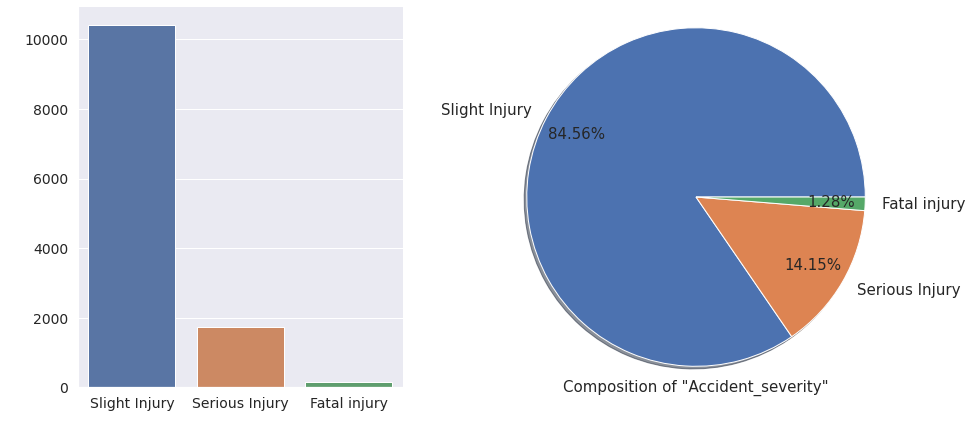

In [16]:
#Checking the target
plt.figure(figsize=(14,7))
#barplot
ax1=plt.subplot(1,2,1)
cp=sns.countplot(x=dataset['Accident_severity'])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)

#Pieplot
ax2=plt.subplot(1,2,2)
plt.pie(dataset['Accident_severity'].value_counts(),
         labels=list(dataset["Accident_severity"].unique()),
         autopct="%1.2f%%",
         pctdistance=0.8,
         shadow=True,
         radius=1.3,
         textprops={'fontsize':15}
         )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident_severity"',fontsize=15,labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()


Observations:-
 Composition of different types of Accident Severity:
* Slight Injury:- 84.56%
* Seroius Injury:- 14.15%
* Fata Injury:- 1.28%

###### Plots of Different columns

In [17]:
dataset.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [18]:
#Getting hour and minute details from time column
dataset['hour']=dataset['Time'].dt.hour
dataset['minute']=dataset['Time'].dt.minute

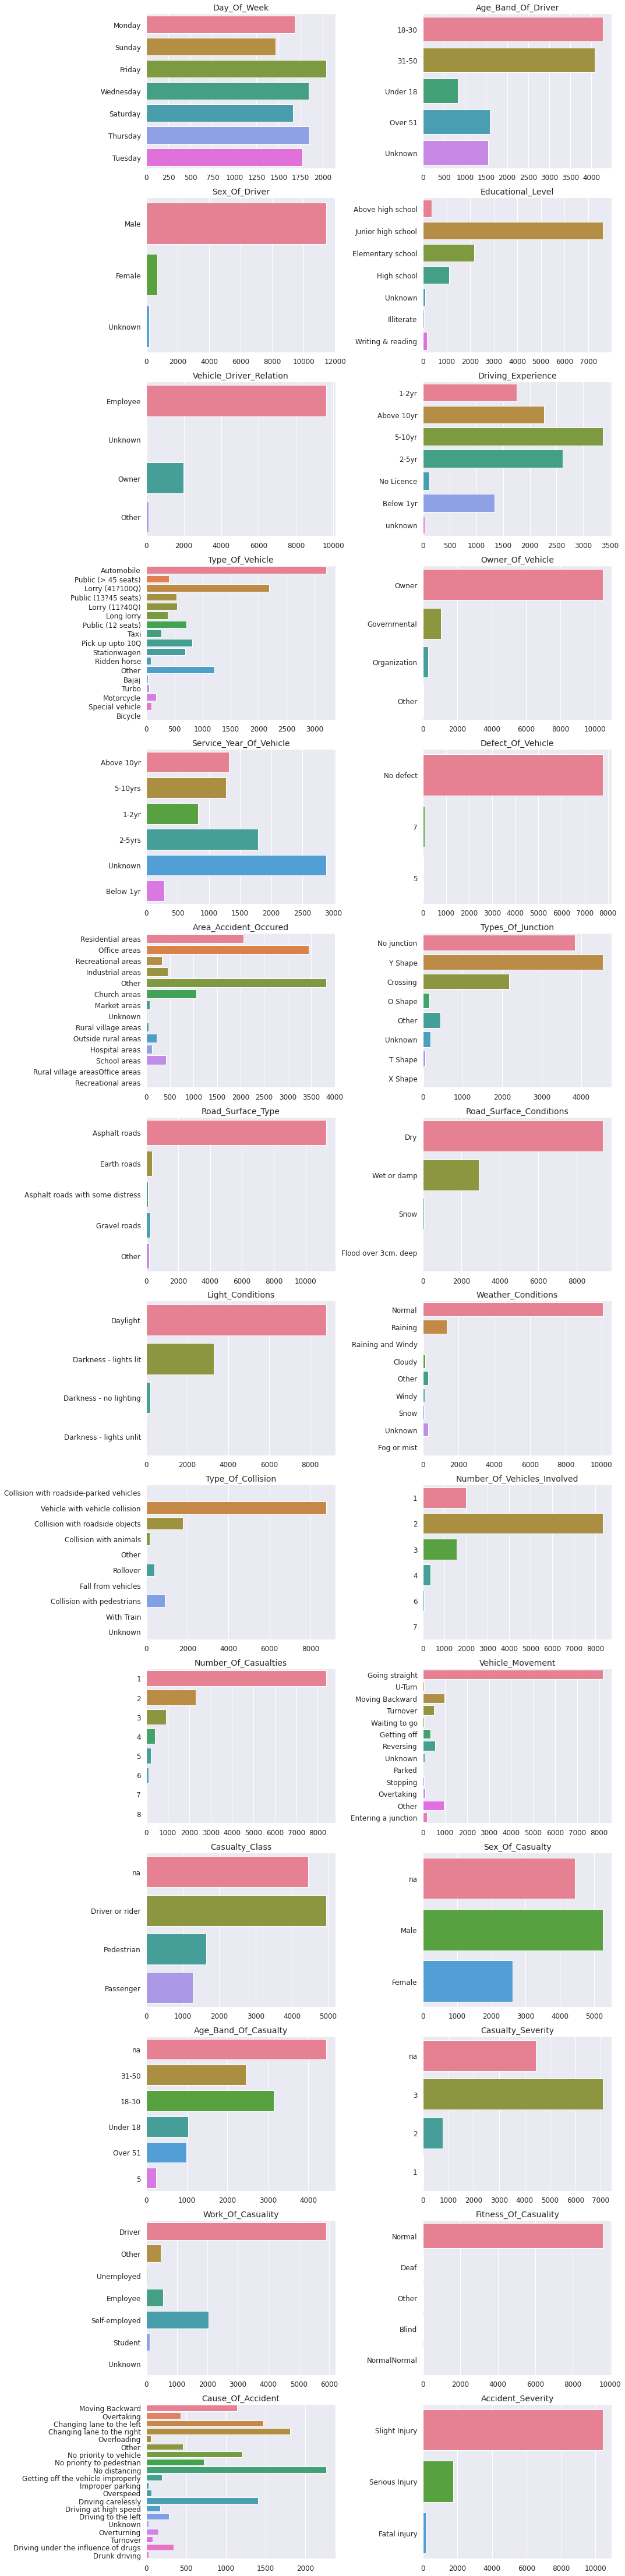

In [19]:
#plot graphs of different columns
plt.figure(figsize=(15,70))
plotnumber=1
for col in dataset.drop(['Time','hour','minute','Lanes_or_Medians','Road_allignment','Pedestrian_movement'], axis=1):
  if plotnumber<= dataset.shape[1]:
    ax1=plt.subplot(16,2,plotnumber)
    sns.countplot(data=dataset,y=col,palette='husl')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(col.title(),fontsize=14)
    plt.xlabel('')
    plt.ylabel('')
  plotnumber+=1
plt.tight_layout()

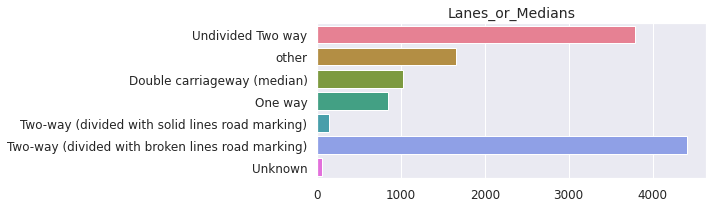

In [20]:
#Now considering Lanes Columns
plt.figure(figsize=(10,3))
sns.countplot(data=dataset, y='Lanes_or_Medians',palette='husl')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes_or_Medians',fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

Two-way(divided with solid lines road marking is most occuring Lane its columns

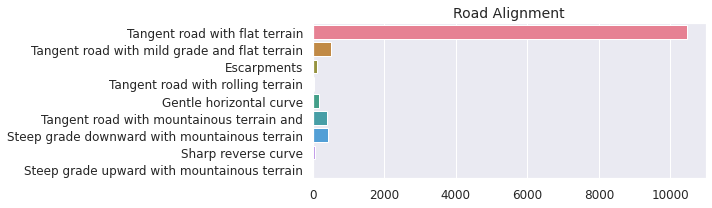

In [21]:
plt.figure(figsize=(10,3))
sns.countplot(data=dataset,y="Road_allignment",palette="husl")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Road Alignment",fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

Tanget Road with flat terrain has most effect on the accident

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


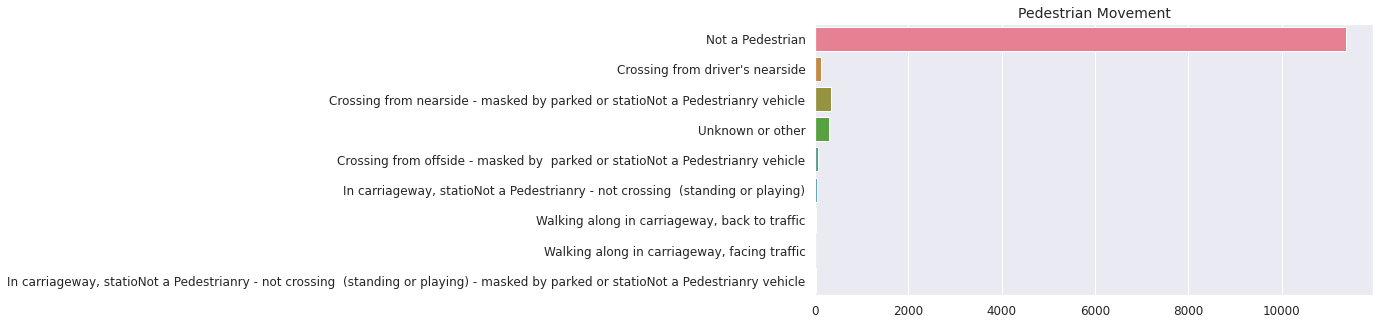

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=dataset,y='Pedestrian_movement',palette="husl")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Pedestrian Movement',fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

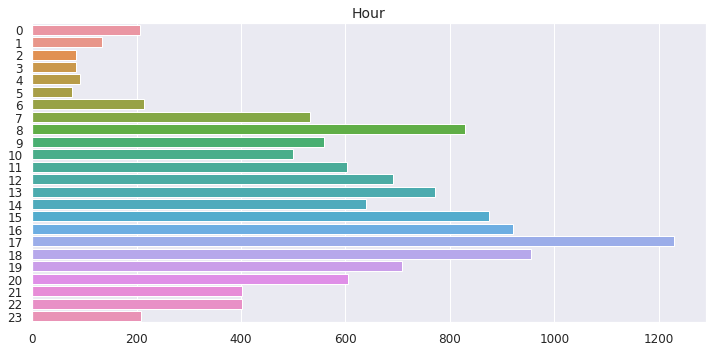

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(data=dataset,y='hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour',fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

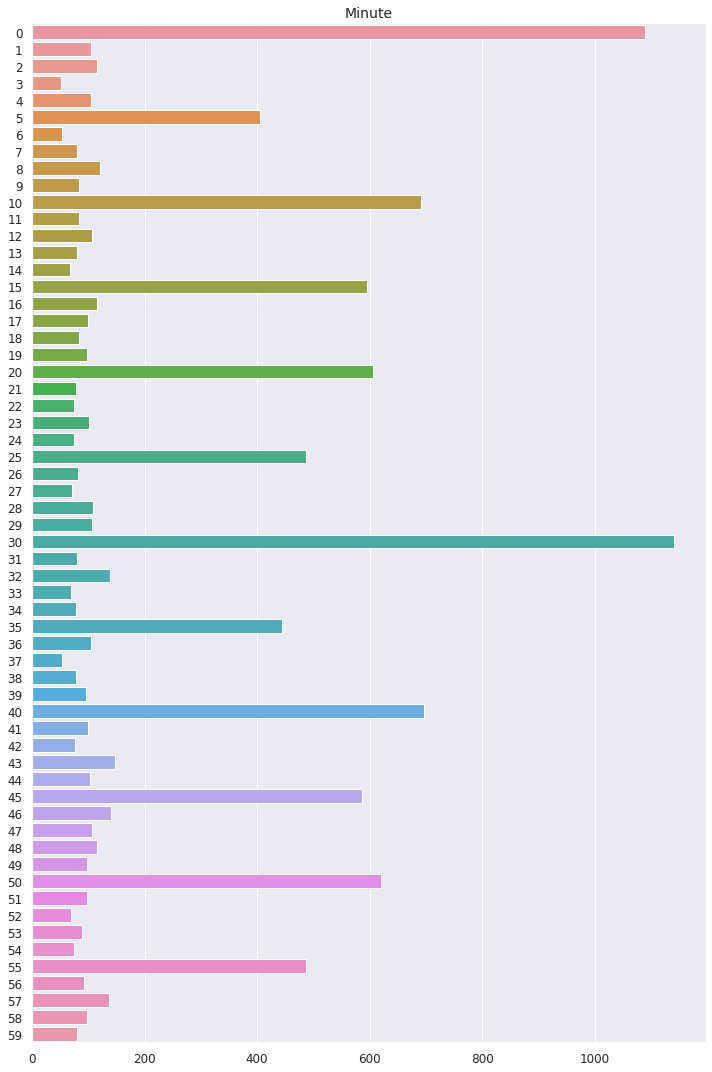

In [24]:
plt.figure(figsize=(10,15))
sns.countplot(data=dataset, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

#### Observations:
* Most of the accidents have taken place between 3pm to 6pm with maximum numbers at 5 pm
* Most of the time in minutes seems to have been recorded in intervals of 5 minutes for the sake of convenience. Hence more numbers to be seen at the 0 and 30 minutes.

#### Observations:

Most of the accidents:
* involved 2 vehicles and 2 casualties
* occured on Fridays and after noon hours

Most of the drivers:
* are male and in 18-30 yrs age group
* have only went upto Junior high school and are employees
* have 5-10 yrs of driving experience

Most of the accidents happened with personally owned passenger vehicles.

Most of the drivers have met with accident on:
* tangent road with flat terrains
* two-way lanes
* Y shaped junctions
* asphalt roads
* day time
* normal weather conditions

Most of the casualties:
* happened to physically fit male drivers
* are of severity 3

The conditions on which most of the drivers met with the accident are:
* vehicle to vehicle collision
* straight movement
* no pedestrian accidents

Not keeping enough distance between the vehicles was the major cause for most of the accidents and majority of the accidents resulted in slight injury.

In [25]:
num_cols=dataset.dtypes[dataset.dtypes=='int64'].index.tolist()
cat_cols=dataset.dtypes[dataset.dtypes!='int64'].index.tolist()
dataset[cat_cols]

Time Day_of_week Age_band_of_driver Sex_of_driver  \
0     2022-08-07 17:02:00      Monday              18-30          Male   
1     2022-08-07 17:02:00      Monday              31-50          Male   
2     2022-08-07 17:02:00      Monday              18-30          Male   
3     2022-08-07 01:06:00      Sunday              18-30          Male   
4     2022-08-07 01:06:00      Sunday              18-30          Male   
...                   ...         ...                ...           ...   
12311 2022-08-07 16:15:00   Wednesday              31-50          Male   
12312 2022-08-07 18:00:00      Sunday            Unknown          Male   
12313 2022-08-07 13:55:00      Sunday            Over 51          Male   
12314 2022-08-07 13:55:00      Sunday              18-30        Female   
12315 2022-08-07 13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
0       Above high school                Employee              1-2yr   
1      Junior high school                Employee         Above 10yr   
2      Junior high school                Employee              1-2yr   
3      Junior high school                Employee             5-10yr   
4      Junior high school                Employee              2-5yr   
...                   ...                     ...                ...   
12311                 NaN                Employee              2-5yr   
12312   Elementary school                Employee             5-10yr   
12313  Junior high school                Employee             5-10yr   
12314  Junior high school                Employee         Above 10yr   
12315  Junior high school                Employee             5-10yr   

           Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  ...  \
0               Automobile            Owner              Above 10yr  ...   
1      Public (> 45 seats)            Owner                 5-10yrs  ...   
2          Lorry (41?100Q)            Owner                     NaN  ...   
3      Public (> 45 seats)     Governmental                     NaN  ...   
4                      NaN            Owner                 5-10yrs  ...   
...                    ...              ...                     ...  ...   
12311       Lorry (11?40Q)            Owner                     NaN  ...   
12312           Automobile            Owner                     NaN  ...   
12313                Bajaj            Owner                  2-5yrs  ...   
12314      Lorry (41?100Q)            Owner                  2-5yrs  ...   
12315                Other            Owner                  2-5yrs  ...   

      Vehicle_movement   Casualty_class Sex_of_casualty Age_band_of_casualty  \
0       Going straight               na              na                   na   
1       Going straight               na              na                   na   
2       Going straight  Driver or rider            Male                31-50   
3       Going straight       Pedestrian          Female                18-30   
4       Going straight               na              na                   na   
...                ...              ...             ...                  ...   
12311   Going straight               na              na                   na   
12312            Other               na              na                   na   
12313            Other  Driver or rider            Male                31-50   
12314            Other               na              na                   na   
12315         Stopping       Pedestrian          Female                    5   

      Casualty_severity Work_of_casuality Fitness_of_casuality  \
0                    na               NaN                  NaN   
1                    na               NaN                  NaN   
2                     3            Driver                  NaN   
3                     3            Driver               Normal   
4                    na               NaN                  NaN 

## Preprocessing

In [26]:
dataset.drop('Time',axis=1,inplace=True)

In [27]:
dataset.isna().sum()[dataset.isna().sum()!=0]

Educational_level           741
Vehicle_driver_relation     579
Driving_experience          829
Type_of_vehicle             950
Owner_of_vehicle            482
Service_year_of_vehicle    3928
Defect_of_vehicle          4427
Area_accident_occured       239
Lanes_or_Medians            385
Road_allignment             142
Types_of_Junction           887
Road_surface_type           172
Type_of_collision           155
Vehicle_movement            308
Work_of_casuality          3198
Fitness_of_casuality       2635
dtype: int64

In [28]:
dataset.columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'hour', 'minute'],
      dtype='object')

In [29]:
# dropping columns that can cause imbalance while imputation
dataset.drop(columns=['Vehicle_driver_relation','Defect_of_vehicle','Work_of_casuality','Fitness_of_casuality'],inplace=True)

In [30]:
#Extracting the columns that can be imputed
#Putting the mode of value of respective columns in place of there null values
impute_cols=[x for x in dataset.isna().sum()[dataset.isna().sum()!=0].index.tolist()]
for feat in impute_cols:
  mode=dataset[feat].mode()[0]
  dataset[feat].fillna(mode,inplace=True)

In [31]:
#Again chacking if there is any NULL left
dataset.isna().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
hour                           0
minute                         0
dtype: int64

## Encoding

In [32]:
#Defining function for Encoding
def ordinal_encoder(dataset,feats):
  for feat in feats:
    val=list(1+np.arange(dataset[feat].nunique()))
    key=list(dataset[feat].sort_values().unique())
    diction=dict(zip(key,val))
    dataset[feat]=dataset[feat].map(diction)
  return dataset

In [33]:
dataset=ordinal_encoder(dataset,dataset.drop(['Accident_severity'],axis=1).columns)
dataset.shape

(12316, 29)

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


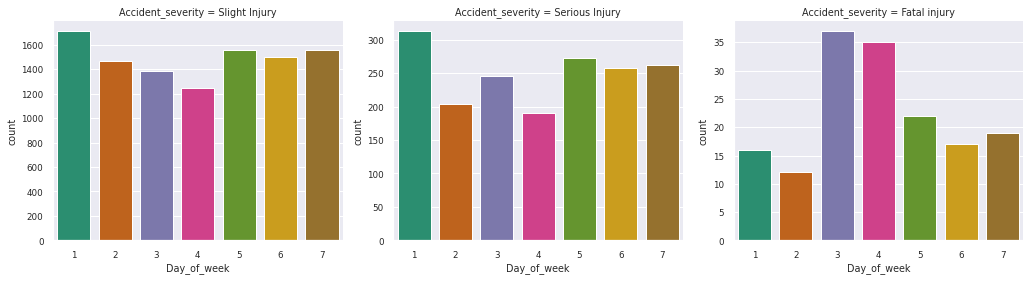

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


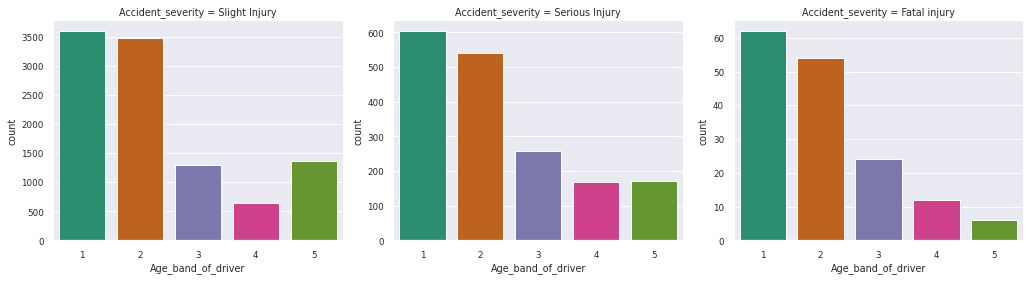

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


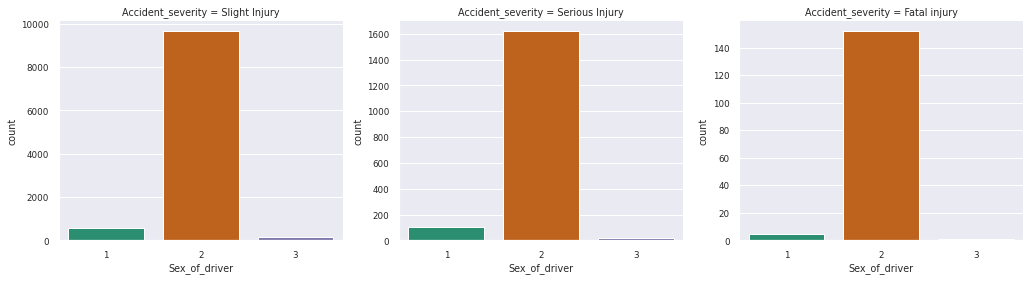

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


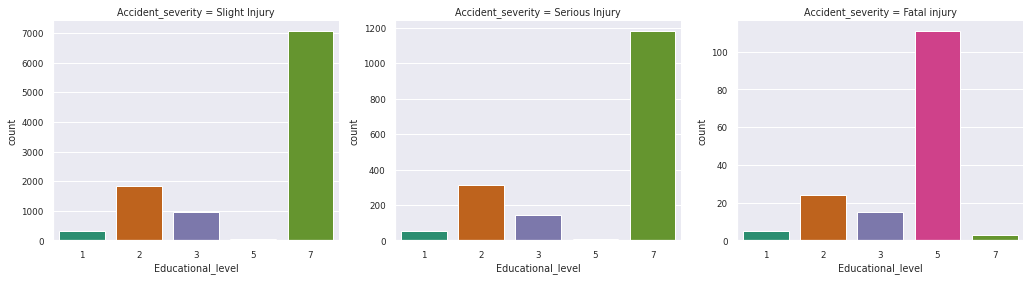

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


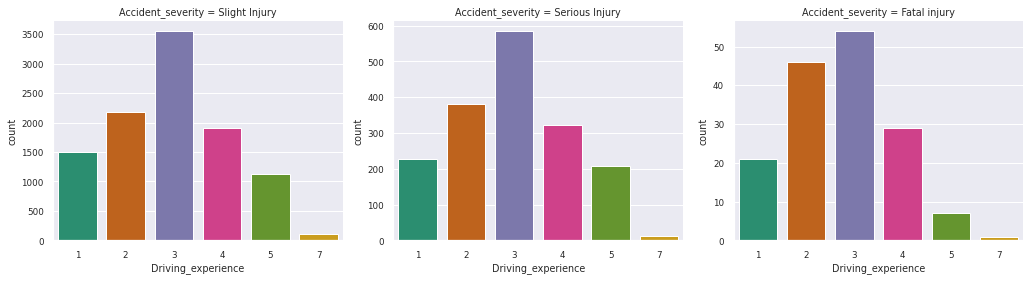

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


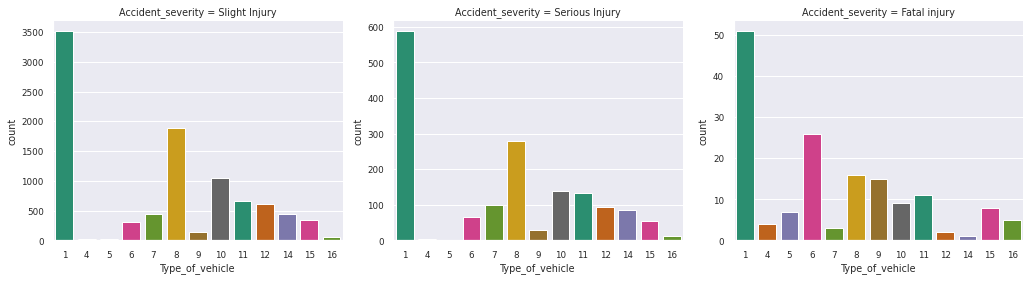

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


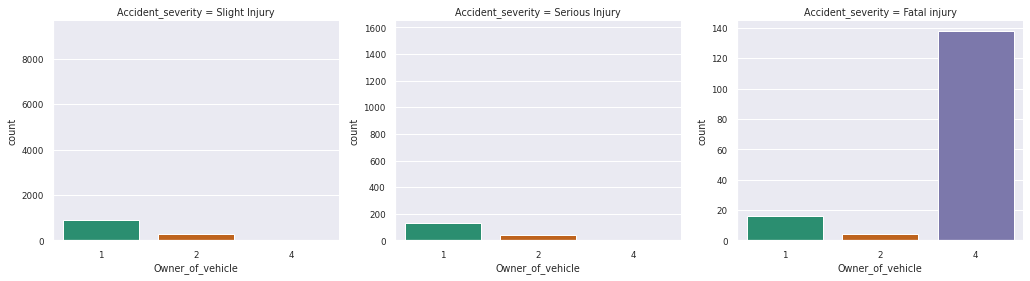

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


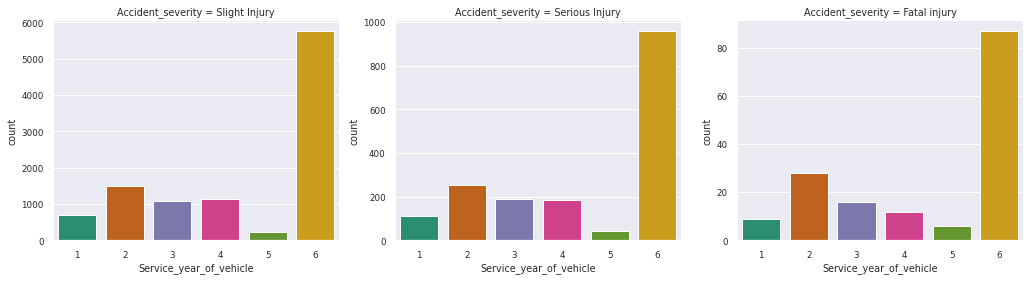

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


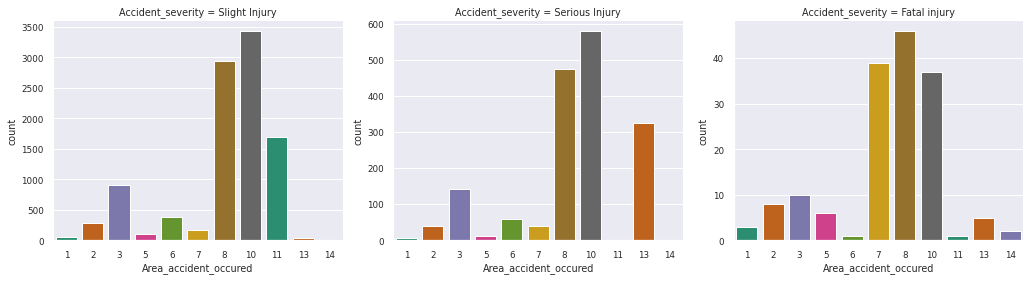

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


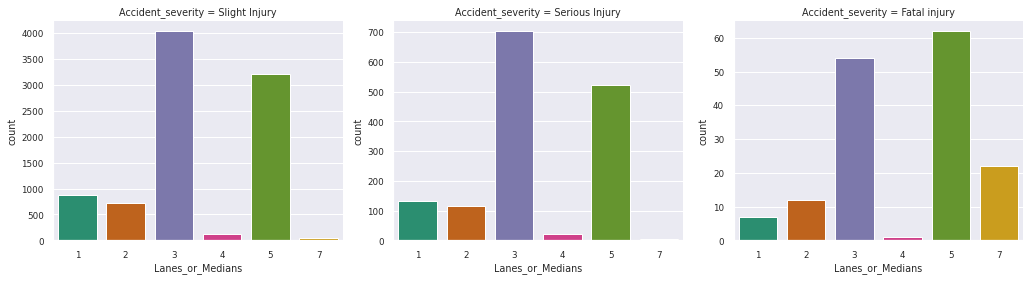

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


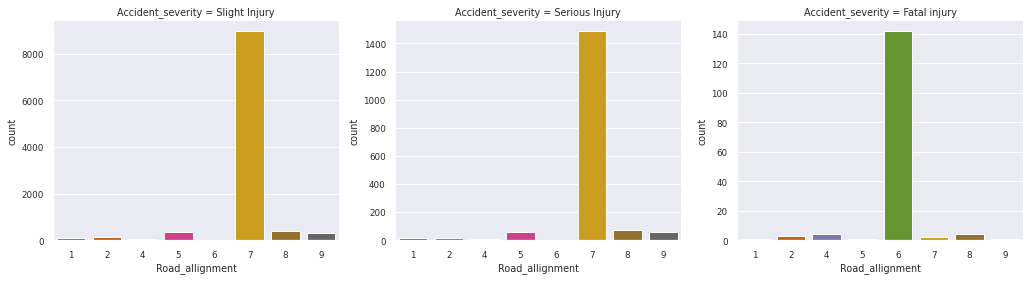

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


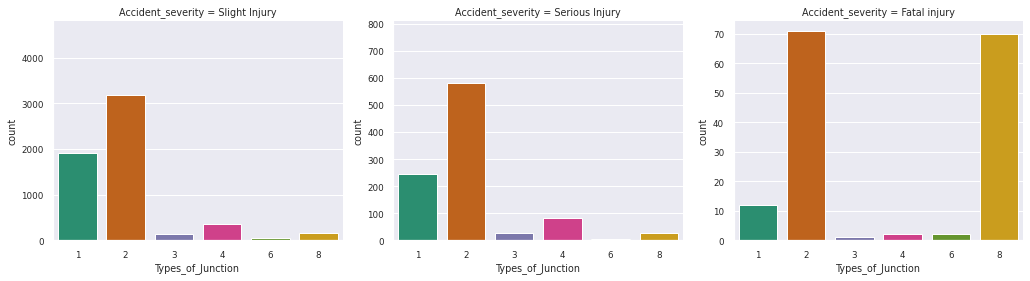

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


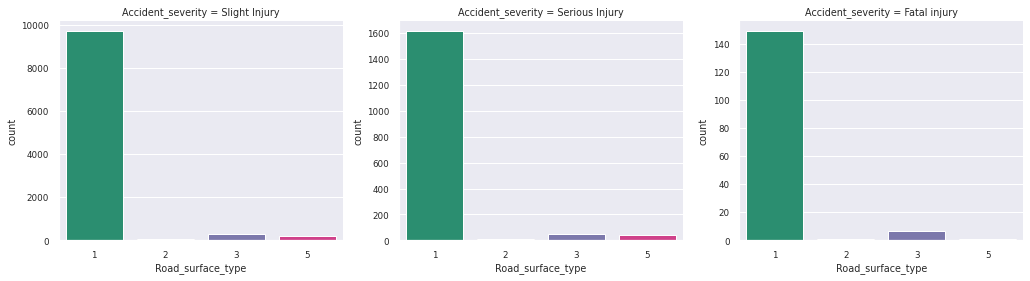

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


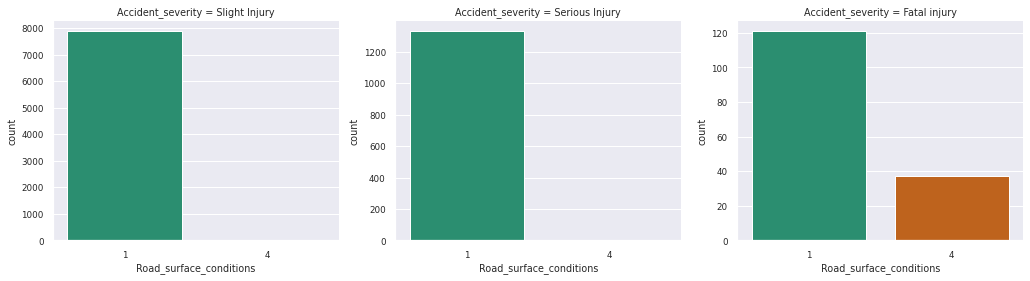

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


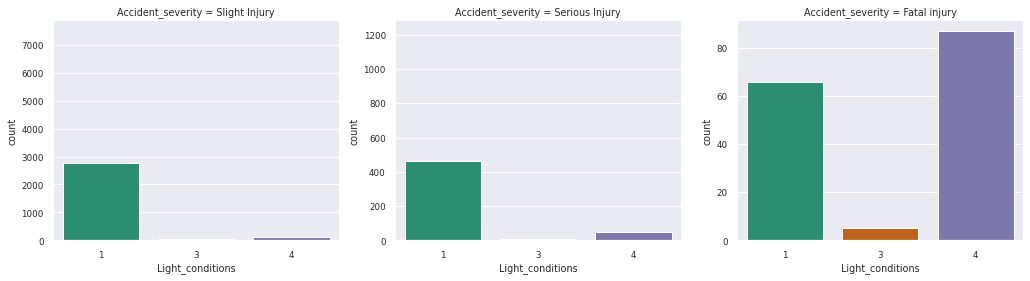

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


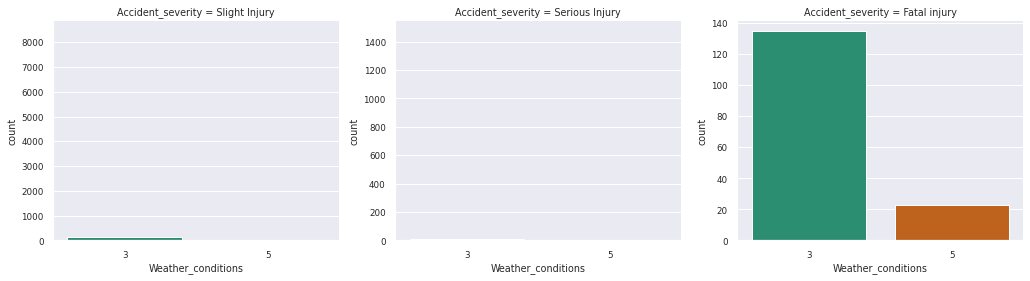

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


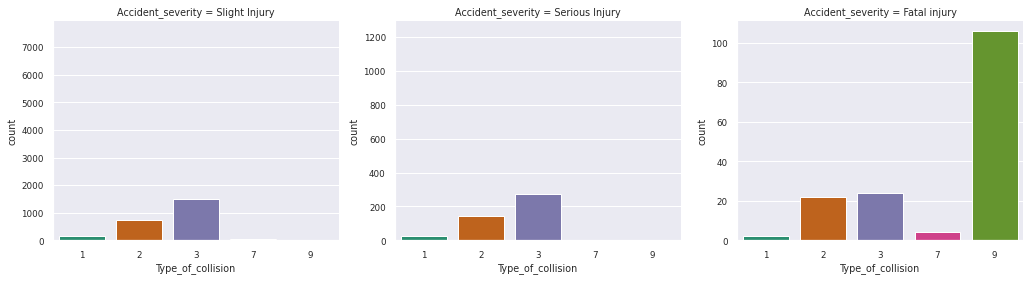

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


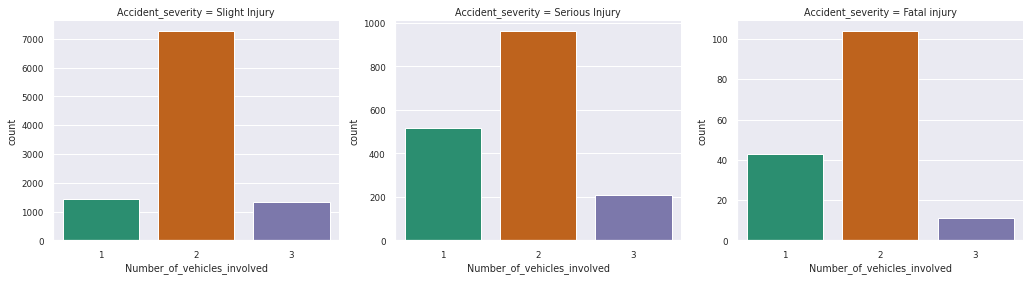

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


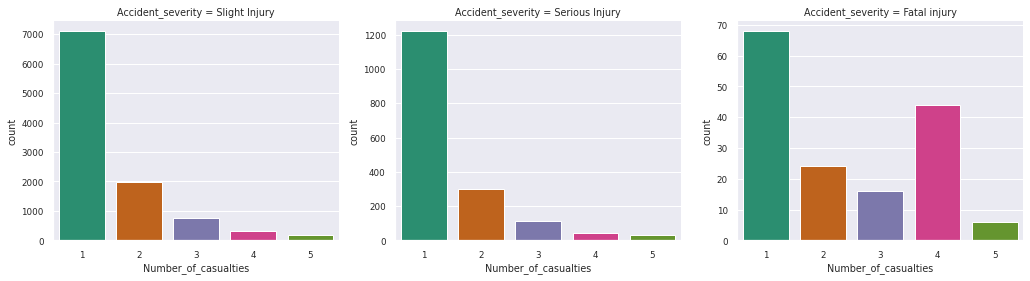

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


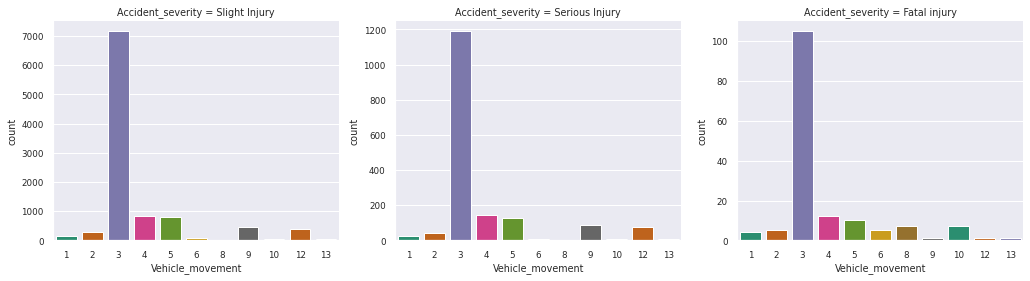

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


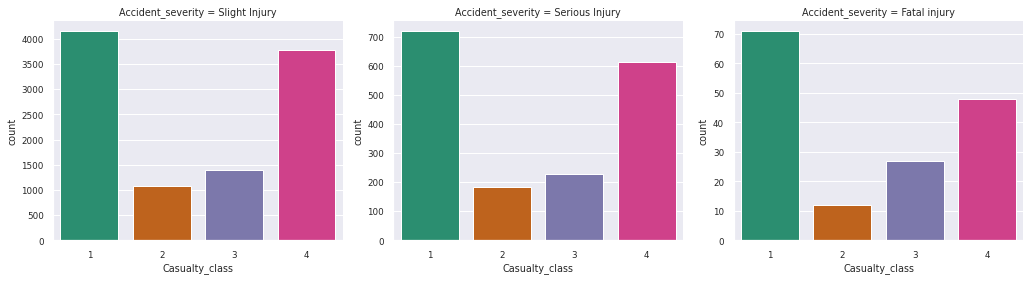

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


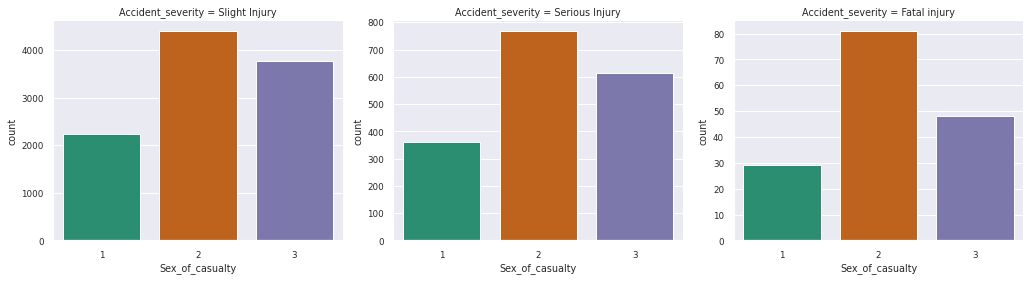

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


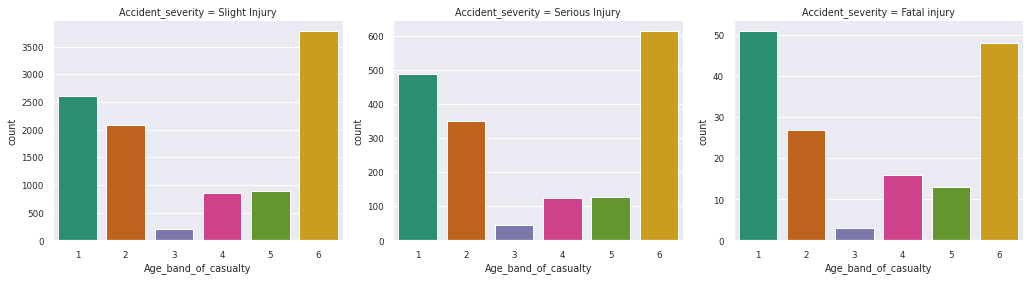

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


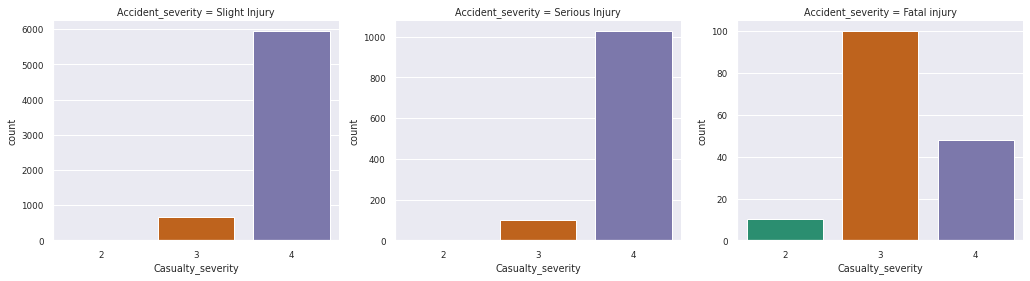

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


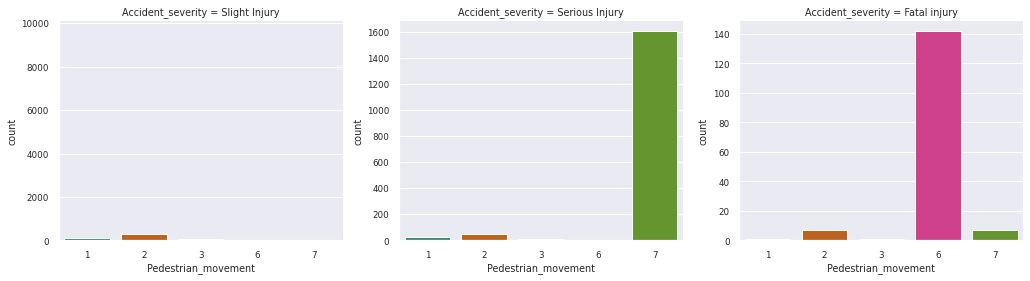

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


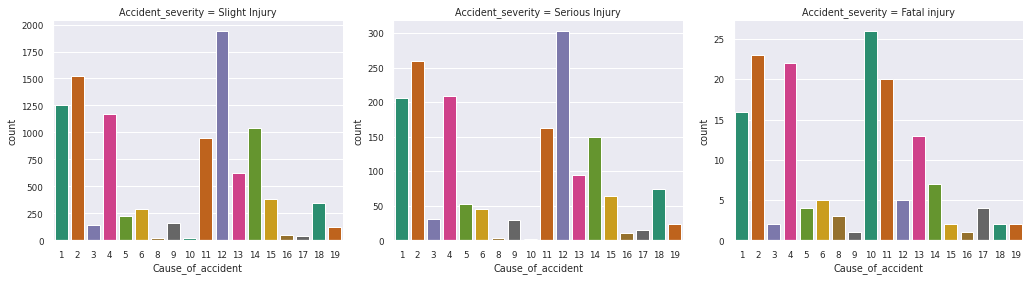

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


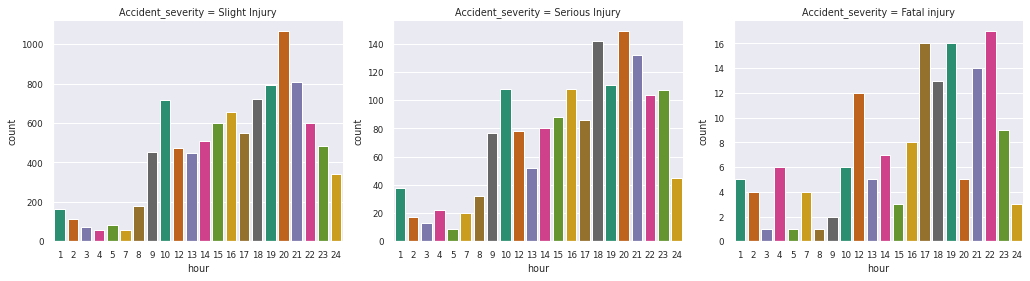

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


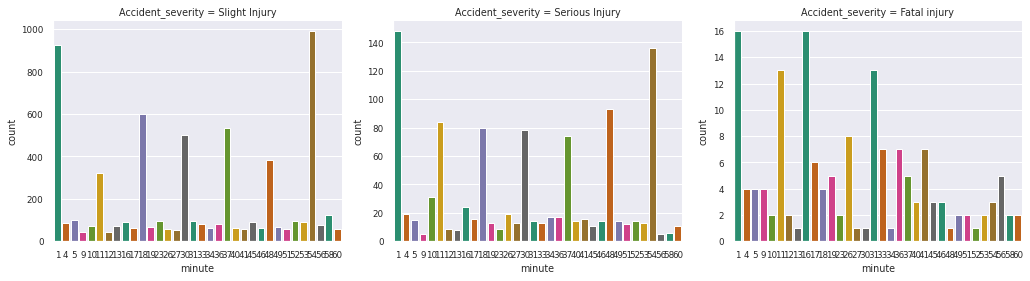

In [126]:
for col in dataset.drop('Accident_severity', axis=1):
    g = sns.FacetGrid(dataset, col='Accident_severity', height=4, aspect=1.2, sharey=False)
    g.map(sns.countplot, col, palette = 'Dark2')
    plt.show()

#### Observations:

* Most of the accidents with fatal injuries happened between 2pm to 7pm.
* Most of the accidents with fatal injuries happened on weekends.
* Highest number of non-fatal injuries happened at 5pm.
* Highest number of non-fatal injuries happened on fridays.
* Most accidents are caused by drivers aged 18-30 and the least by drivers aged under 18.
* Proportion of fatal accidents are lower for female drivers.
* Drivers with 2-5yrs of experience caused most accidents with fatal injury and those with 5-10yrs experience caused most accidents with non-fatal injuries.
* Proportion of fatal injuries caused by vehicles with more than 10yrs of service is lower compared to non-fatal injuries.
* Though most of the accident happened around offices, a higher proportion of accidents happened around residential areas have led to fatal injuries.
* Most accidents with fatal injuries occured on undivided two-ways.
* Most accidents with non-fatal injuries occured on two-way divided with broken lines road marking
* Double carriageway has a lower proportion of fatal accidents compared to non-fatal accidents.
* Severity of accidents increases at places with no junctions and the most number of fatal injuries occured at places with no junctions.
* Crossings and Y-shaped junctions shows a decreasing trend with respect to severity of accidents though the numbers are high.
* Most of the accidents with fatal injury have happened at night.
* Collisions with pedestrians have resulted in more fatal injuries compared to non-fatal injuries.
* Accidents with 4 casualties have a huge proportion on fatal injuries compared to non-fatal injuries.
* Accidents involving drivers with 18-30yrs of age have an increasing pattern with respect to severity of injuries.
* Moving backward led to most of the accidents with fatal injuries whereas failing to keep enough distance between vehicles led to more number of accidents with non-fatal injuries.

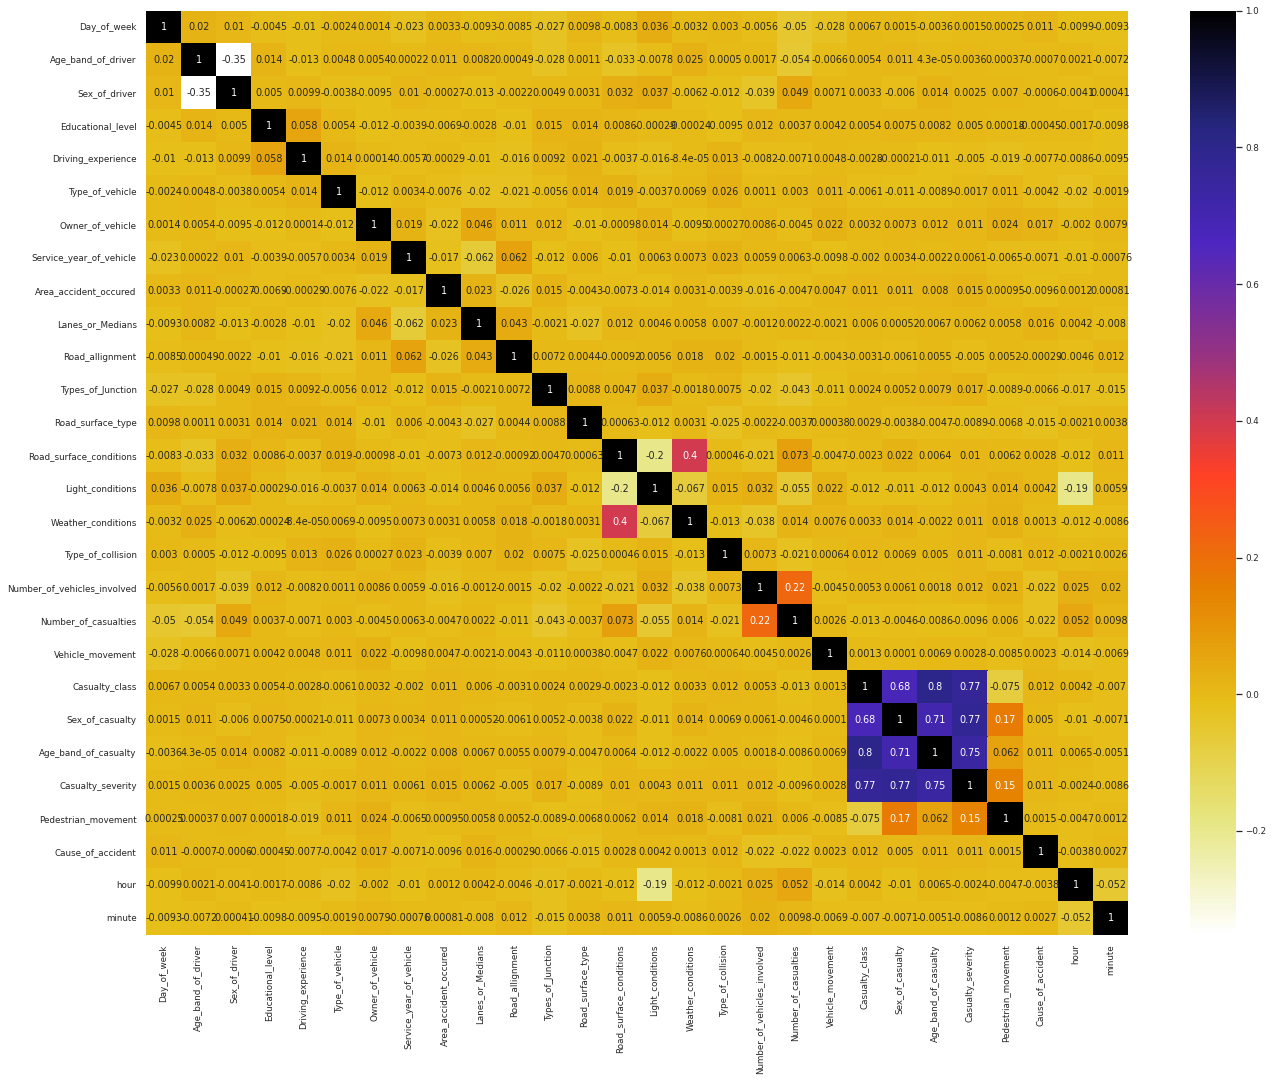

In [35]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(dataset.corr(),annot=True,cmap=plt.cm.CMRmap_r)

In [36]:
dataset.columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Driving_experience', 'Type_of_vehicle',
       'Owner_of_vehicle', 'Service_year_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'hour', 'minute'],
      dtype='object')

### Upsampling

In [37]:
x=dataset.drop('Accident_severity',axis=1)
y=dataset['Accident_severity']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(8621, 28) (3695, 28) (8621,) (3695,)


In [38]:
#Upsampling using SMOTE
counter=Counter(y_train)
print("==============================================")
for k,v in counter.items():
  per=100*v/len(y_train)
  print(f"Class={k}, n={v} ({per:.2f}%)")

oversample=SMOTE()
X_train,y_train=oversample.fit_resample(X_train,y_train)

counter=Counter(y_train)

print("==================================================")

for k,v in counter.items():
  per=100*v/len(y_train)
  print(f"Class= {k}, n={v} ({per:.2f}%)")

print("===================================================")

print("Upsampled data Shape: ",X_train.shape, y_train.shape)


Class=Slight Injury, n=7324 (84.96%)
Class=Serious Injury, n=1191 (13.82%)
Class=Fatal injury, n=106 (1.23%)
Class= Slight Injury, n=7324 (33.33%)
Class= Serious Injury, n=7324 (33.33%)
Class= Fatal injury, n=7324 (33.33%)
Upsampled data Shape:  (21972, 28) (21972,)


In [39]:
y_test

4281      Slight Injury
4010      Slight Injury
1022     Serious Injury
8775      Slight Injury
10000     Slight Injury
              ...      
9855      Slight Injury
7302     Serious Injury
9023      Slight Injury
7936      Slight Injury
438       Slight Injury
Name: Accident_severity, Length: 3695, dtype: object

In [40]:
y_test=ordinal_encoder(pd.DataFrame(y_test,columns=['Accident_severity']),pd.DataFrame(y_test,columns=['Accident_severity']).columns)['Accident_severity']
y_train=ordinal_encoder(pd.DataFrame(y_train,columns=['Accident_severity']),pd.DataFrame(y_train,columns=['Accident_severity']).columns)['Accident_severity']

# Baseline Modeling

In [41]:
def modelling(X_train,y_train,X_test,y_test, **kwargs):
  scores={}
  models=[]
  if 'xgb' in kwargs.keys() and kwargs['xgb']:
    xgb=XGBClassifier()
    xgb.fit(X_train._get_numeric_data(),np.ravel(y_train,order='C'))
    y_pred=xgb.predict(X_test._get_numeric_data())
    scores['xgb']=[accuracy_score(y_test,y_pred)]

  if 'rf' in kwargs.keys() and kwargs['rf']:
    rf=RandomForestClassifier(n_estimators=200)
    rf.fit(X_train,y_train)
    y_pred=rf.predict(X_test)
    scores['rf']=[accuracy_score(y_test,y_pred)]
    models.append(rf)

  if 'extree' in kwargs.keys() and kwargs['extree']:
    extree=ExtraTreesClassifier()
    extree.fit(X_train, y_train)
    y_pred = extree.predict(X_test)
    scores['extree'] = [accuracy_score(y_test, y_pred)]
    models.append(extree)

  if 'logr' in kwargs.keys() and kwargs['logr']:
    logr=LogisticRegression()
    logr.fit(X_train,y_train)
    ypred=logr.predict(X_test)
    scores['logr'] = [accuracy_score(y_test, y_pred)]
    models.append(logr)
  return scores  

In [42]:
modelling(X_train,y_train, X_test, y_test, xgb=True, rf=True, extree=True,logr=True)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'extree': [0.808660351826793],
 'logr': [0.808660351826793],
 'rf': [0.7967523680649526],
 'xgb': [0.6912043301759134]}

In [43]:
def model_performance(model,y_test,y_hat):
  conf_matrix=confusion_matrix(y_test,y_hat)
  trace1=go.Heatmap(z=conf_matrix,x=["0 (pred)","1 (pred)","2 (pred)"],
                    y=["0 (true)","1 (true)","2 (true)"],xgap=2,ygap=2,
                    colorscale='Viridis',showscale=False)
  
  #Show Metrics
  Accuracy=accuracy_score(y_test,y_hat)
  Precision=precision_score(y_test,y_hat,average='weighted')
  Recall=recall_score(y_test,y_hat,average='weighted')
  F1_score=f1_score(y_test,y_hat,average='weighted')

  show_metrics=pd.DataFrame(data=[[Accuracy,Precision,Recall,F1_score]])
  show_metrics=show_metrics.T

  colors=['gold','lightgreen','lightcoral','lightskyblue']
  trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
  
  #Plots
  model=model
  
  #Subplots
  fig = tls.make_subplots(rows=2, cols=1, print_grid=False, 
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        ))
    
  fig.append_trace(trace1,1,1)
  fig.append_trace(trace2,2,1)
  fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = True, height = 800,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        # margin = dict(b = 100)
                        )
   
  fig.layout.titlefont.size = 14
  py.iplot(fig)

In [44]:
extree = ExtraTreesClassifier()
extree.fit(X_train, y_train)
y_pred = extree.predict(X_test)

In [45]:
extree.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [46]:
model_performance(extree,y_test, y_pred)

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead


# Hyperparameter Tuning
1st Attempt

In [47]:
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)

# A parameter grid for XGBoost
params = {
    'n_estimators': range(100, 500, 100),
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}

extree_estimator = ExtraTreesClassifier()

gsearch = GridSearchCV(
    estimator= extree_estimator,
    param_grid= params,
    scoring='f1_weighted',
    cv=gkf,
)

extree_model = gsearch.fit(X=X_train, y=y_train)
(gsearch.best_params_, gsearch.best_score_)


({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 11,
  'min_samples_split': 3,
  'n_estimators': 100},
 0.8623075661353748)

2nd Attempt

In [48]:
gkf2=KFold(n_splits=3,shuffle=True,random_state=101).split(X=X_train,y=y_train)

params2={
    'n_estimators':range(400,800,100),
    'max_depth':[11,15],
    'min_samples_split':[2,3],
    'class_weight':['balanced',None],
}

extree2=ExtraTreesClassifier(ccp_alpha=0.0,
                             criterion='gini',
                             max_depth=11,
                             min_samples_split=3,
                             n_estimators=400)

gsearch2=GridSearchCV(
    estimator=extree2,
    param_grid=params2,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf2,
    verbose=3,
)

extree_model2=gsearch2.fit(X=X_train,y=y_train)

final_model=gsearch.best_estimator_
(gsearch2.best_params_,gsearch2.best_score_)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'class_weight': 'balanced',
  'max_depth': 15,
  'min_samples_split': 2,
  'n_estimators': 600},
 0.9228690686038122)

In [49]:
extree_tuned = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                min_samples_split = 2,
                                class_weight = 'balanced',
                                max_depth = 15,
                                n_estimators = 400)

extree_tuned.fit(X_train, y_train)
y_pred_tuned = extree_tuned.predict(X_test)

In [50]:
score_tuned=accuracy_score(y_test,y_pred_tuned)
print("Accuracy: ",score_tuned)

Accuracy:  0.7810554803788904


In [51]:
extree_tuned.feature_importances_

array([0.05362986, 0.05774144, 0.01680394, 0.02911386, 0.04280062,
       0.0309438 , 0.02115779, 0.03493001, 0.02754397, 0.03742224,
       0.01390847, 0.04327908, 0.0113359 , 0.04170898, 0.0694748 ,
       0.01727203, 0.03287535, 0.06311524, 0.063578  , 0.01968001,
       0.03337224, 0.03849044, 0.03030223, 0.02525664, 0.01147361,
       0.03685507, 0.03981736, 0.05611705])

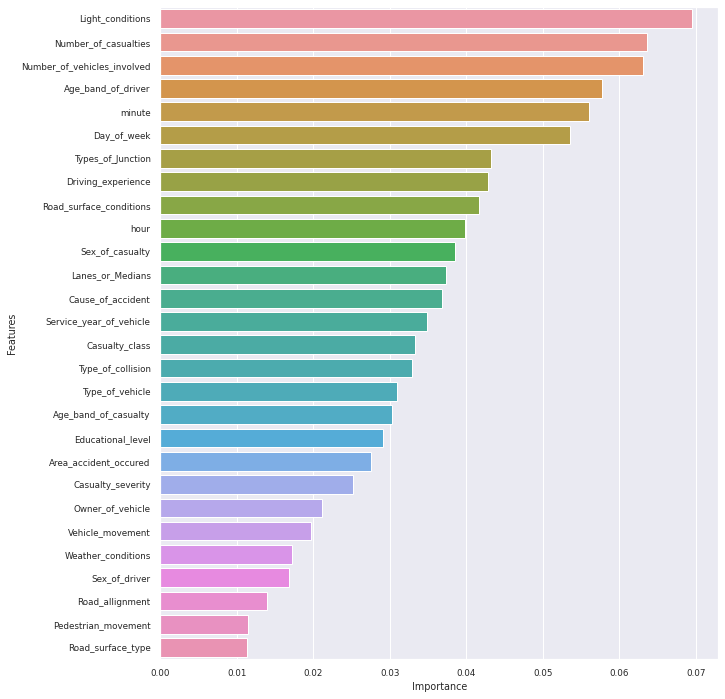

In [52]:
df_importance=pd.DataFrame()
df_importance['Features']=x.columns
df_importance['Importance']=extree_tuned.feature_importances_
plt.figure(figsize=(10,12))
sns.barplot(data=df_importance.sort_values("Importance",ascending=False),y='Features',x='Importance')

In [53]:
#Selecting the top 10 features
top11=list(df_importance.sort_values("Importance",ascending=False)['Features'].head(11).values)
top11

['Light_conditions',
 'Number_of_casualties',
 'Number_of_vehicles_involved',
 'Age_band_of_driver',
 'minute',
 'Day_of_week',
 'Types_of_Junction',
 'Driving_experience',
 'Road_surface_conditions',
 'hour',
 'Sex_of_casualty']

In [54]:
df_top11=dataset[top11]
df_top11

Light_conditions  Number_of_casualties  Number_of_vehicles_involved  \
0                     4                     2                            2   
1                     4                     2                            2   
2                     4                     2                            2   
3                     1                     2                            2   
4                     1                     2                            2   
...                 ...                   ...                          ...   
12311                 4                     1                            2   
12312                 4                     1                            2   
12313                 4                     1                            1   
12314                 1                     1                            2   
12315                 1                     1                            2   

       Age_band_of_driver  minute  Day_of_week  Types_of_Junction  \
0                       1       3            2                  2   
1                       2       3            2                  2   
2                       1       3            2                  2   
3                       1       7            4                  8   
4                       1       7            4                  8   
...                   ...     ...          ...                ...   
12311                   2      16            7                  2   
12312                   5       1            4                  2   
12313                   3      56            4                  2   
12314                   1      56            4                  2   
12315                   1      56            4                  3   

       Driving_experience  Road_surface_conditions  hour  Sex_of_casualty  
0                       1                        1    18                3  
1                       4                        1    18                3  
2                       1                        1    18                2  
3                       3                        1     2                1  
4                       2                        1     2                3  
...                   ...                      ...   ...              ...  
12311                   2                        1    17                3  
12312                   3                        1    19                3  
12313                   3                        1    14                2  
12314                   4                        1    14                3  
12315                   3                        1    14                1  

[12316 rows x 11 columns]

In [55]:
X_train_new,X_test_new,y_train_new,y_test_new=train_test_split(df_top11,y,test_size=0.3,random_state=42)
print(X_train_new.shape,X_test_new.shape,y_train_new.shape,y_test_new.shape)

(8621, 11) (3695, 11) (8621,) (3695,)


In [56]:
#fitting the model
extree_tuned.fit(X_train_new,y_train_new)

ExtraTreesClassifier(class_weight='balanced', max_depth=15, n_estimators=400)

In [57]:
#Predicting
y_pred_new=extree_tuned.predict(X_test_new)
score_tuned_new=accuracy_score(y_test_new,y_pred_new)
print("Accuracy: ",score_tuned_new)

Accuracy:  0.8419485791610284


In [58]:
extree_tuned.get_params

<bound method BaseEstimator.get_params of ExtraTreesClassifier(class_weight='balanced', max_depth=15, n_estimators=400)>

# Saving the model

In [59]:
from sklearn.ensemble import ExtraTreesClassifier

clf=ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                min_samples_split = 2,
                                class_weight = 'balanced',
                                max_depth = 15,
                                n_estimators = 400)
clf.fit(X_train_new,y_train_new)


ExtraTreesClassifier(class_weight='balanced', max_depth=15, n_estimators=400)

In [60]:
import joblib

joblib.dump(clf,"/content/drive/MyDrive/Road_Traffic_Severity_Classification/Model/model.pkl")

['/content/drive/MyDrive/Road_Traffic_Severity_Classification/Model/model.pkl']

In [61]:
model=joblib.load("/content/drive/MyDrive/Road_Traffic_Severity_Classification/Model/model.pkl")


In [62]:
model

ExtraTreesClassifier(class_weight='balanced', max_depth=15, n_estimators=400)

In [121]:
import joblib
!pip install bz2file
import bz2file as bz2


def compressed_pickle(title, data):
  with bz2.BZ2File(title + '.pbz2', 'w') as f:
    joblib.dump(data, f)

compressed_pickle("/content/drive/MyDrive/Road_Traffic_Severity_Classification/Model/model1",clf)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [122]:
def decompress_pickle(file):
  data = bz2.BZ2File(file, 'rb')
  data = joblib.load(data)
  return data

model1=decompress_pickle("/content/drive/MyDrive/Road_Traffic_Severity_Classification/Model/model1.pbz2")

In [91]:
X_test_new.iloc[0]

Light_conditions                4
Number_of_casualties            2
Number_of_vehicles_involved     2
Age_band_of_driver              3
minute                         28
Day_of_week                     1
Types_of_Junction               2
Driving_experience              4
Road_surface_conditions         1
hour                           15
Sex_of_casualty                 3
Name: 4281, dtype: int64

In [96]:
pred=model.predict(X_test_new.head(1))
pred

array(['Slight Injury'], dtype=object)

In [123]:
pred1=model1.predict(X_test_new.head(1))
pred1

array(['Slight Injury'], dtype=object)

In [98]:
prob=model.predict_proba(X_test_new.head(1))
prob

array([[0.0407994, 0.1945986, 0.764602 ]])

In [63]:
datasetexample=pd.read_csv("/content/drive/MyDrive/Road_Traffic_Severity_Classification/Dataset/RTA Dataset.csv")
datasetexample['Time']=pd.to_datetime(datasetexample['Time'])
datasetexample['hour']=datasetexample['Time'].dt.hour
datasetexample['minute']=datasetexample['Time'].dt.minute
datasetexample=datasetexample[top11]
datasetexample.head()

Light_conditions  Number_of_casualties  Number_of_vehicles_involved  \
0               Daylight                     2                            2   
1               Daylight                     2                            2   
2               Daylight                     2                            2   
3  Darkness - lights lit                     2                            2   
4  Darkness - lights lit                     2                            2   

  Age_band_of_driver  minute Day_of_week Types_of_Junction Driving_experience  \
0              18-30       2      Monday       No junction              1-2yr   
1              31-50       2      Monday       No junction         Above 10yr   
2              18-30       2      Monday       No junction              1-2yr   
3              18-30       6      Sunday           Y Shape             5-10yr   
4              18-30       6      Sunday           Y Shape              2-5yr   

  Road_surface_conditions  hour Sex_of_casualty  
0                     Dry    17              na  
1                     Dry    17              na  
2                     Dry    17            Male  
3                     Dry     1          Female  
4                     Dry     1              na

In [125]:
datasetexample.columns

Index(['Light_conditions', 'Number_of_casualties',
       'Number_of_vehicles_involved', 'Age_band_of_driver', 'minute',
       'Day_of_week', 'Types_of_Junction', 'Driving_experience',
       'Road_surface_conditions', 'hour', 'Sex_of_casualty'],
      dtype='object')

In [65]:
for col in datasetexample.columns:
  print("{}".format(col))
  print(datasetexample[col].unique().tolist())
  print("======================================")

Light_conditions
['Daylight', 'Darkness - lights lit', 'Darkness - no lighting', 'Darkness - lights unlit']
Number_of_casualties
[2, 1, 3, 4, 6, 5, 8, 7]
Number_of_vehicles_involved
[2, 1, 3, 6, 4, 7]
Age_band_of_driver
['18-30', '31-50', 'Under 18', 'Over 51', 'Unknown']
minute
[2, 6, 15, 30, 20, 40, 45, 10, 11, 36, 35, 25, 57, 50, 12, 19, 38, 39, 55, 1, 0, 48, 17, 32, 54, 4, 52, 33, 59, 53, 23, 24, 34, 5, 8, 49, 41, 16, 3, 31, 43, 58, 47, 13, 22, 44, 18, 21, 46, 7, 51, 26, 28, 9, 56, 29, 27, 42, 37, 14]
Day_of_week
['Monday', 'Sunday', 'Friday', 'Wednesday', 'Saturday', 'Thursday', 'Tuesday']
Types_of_Junction
['No junction', 'Y Shape', 'Crossing', 'O Shape', 'Other', 'Unknown', 'T Shape', 'X Shape', nan]
Driving_experience
['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', nan, 'No Licence', 'Below 1yr', 'unknown']
Road_surface_conditions
['Dry', 'Wet or damp', 'Snow', 'Flood over 3cm. deep']
hour
[17, 1, 14, 22, 8, 15, 12, 18, 13, 20, 16, 21, 9, 10, 19, 11, 23, 7, 0, 5, 6, 4, 3, 2]
Sex_of_

In [102]:
def ordinal_encoder1(input_val,feats):
  feat_val=list(1+np.arange(len(feats)))
  print(feat_val)
  feat_key=feats
  feat_dict=dict(zip(feat_key,feat_val))
  print(feat_dict)
  value=feat_dict[input_val]
  return value
ordinal_encoder1('Monday',['Monday', 'Sunday', 'Friday', 'Wednesday', 'Saturday', 'Thursday', 'Tuesday'])

[1, 2, 3, 4, 5, 6, 7]
{'Monday': 1, 'Sunday': 2, 'Friday': 3, 'Wednesday': 4, 'Saturday': 5, 'Thursday': 6, 'Tuesday': 7}


1

# Explainable AI

In [66]:
shap.initjs()

In [67]:
X_sample = X_train.sample(100)
X_sample

Day_of_week  Age_band_of_driver  Sex_of_driver  Educational_level  \
9317             4                   1              2                  5   
11428            1                   2              2                  3   
5265             1                   1              2                  3   
17153            6                   3              2                  2   
6672             3                   2              2                  5   
...            ...                 ...            ...                ...   
8963             4                   2              2                  5   
1317             3                   4              2                  5   
21852            4                   1              2                  2   
13763            4                   1              2                  5   
8911             3                   4              1                  1   

       Driving_experience  Type_of_vehicle  Owner_of_vehicle  \
9317                    2                5                 4   
11428                   2               11                 4   
5265                    5                1                 4   
17153                   2                6                 4   
6672                    3                6                 4   
...                   ...              ...               ...   
8963                    3                9                 2   
1317                    4                4                 4   
21852                   4                4                 4   
13763                   2               10                 4   
8911                    3                2                 4   

       Service_year_of_vehicle  Area_accident_occured  Lanes_or_Medians  ...  \
9317                         5                      8                 5  ...   
11428                        3                      7                 3  ...   
5265                         2                     10                 5  ...   
17153                        6                      9                 4  ...   
6672                         4                      8                 5  ...   
...                        ...                    ...               ...  ...   
8963                         3                      4                 5  ...   
1317                         6                      7                 3  ...   
21852                        6                      7                 3  ...   
13763                        6                      8                 4  ...   
8911                         5                      7                 3  ...   

       Number_of_casualties  Vehicle_movement  Casualty_class  \
9317                      4                 6               2   
11428                     4                 3               1   
5265                      3                 3               4   
17153                     6                 3               3   
6672                      5                 3               1   
...                     ...               ...             ...   
8963                      4                 3               2   
1317                      2                 3               4   
21852                     1                 3               3   
13763                     2                 3               3   
8911                      1                 3               3   

       Sex_of_casualty  Age_band_of_casualty  Casualty_severity  \
9317                 1                     2                  3   
11428                1                     1                  3   
5265                 3                     6                  4   
17153                2                     4                  3   
6672                 2                     1                  3   
...                ...                   ...                ...   
8963                 2                     5                  3   
1317                 3                     6   

In [68]:
X_sample.columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Driving_experience', 'Type_of_vehicle',
       'Owner_of_vehicle', 'Service_year_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement',
       'Cause_of_accident', 'hour', 'minute'],
      dtype='object')

In [69]:
shap_values = shap.TreeExplainer(extree_tuned).shap_values(X_sample)

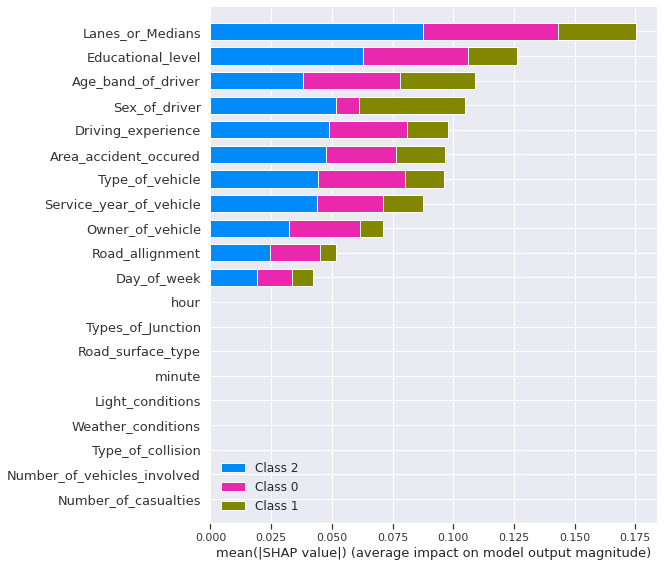

In [70]:
shap.summary_plot(shap_values,X_sample,plot_type="bar")

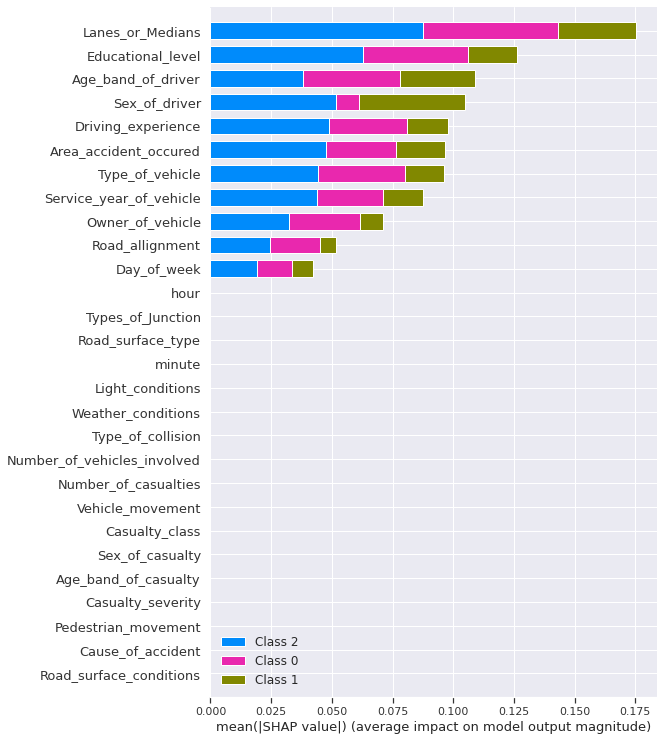

In [71]:
shap.summary_plot(shap_values,X_sample,max_display=28)

In [72]:
shap_values[0]

array([[-0.02046812, -0.04786521, -0.00663238, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01028946, -0.05188806, -0.02018984, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01216997, -0.04227475, -0.01296363, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.01625397, -0.06670715, -0.00443985, ...,  0.        ,
         0.        ,  0.        ],
       [-0.02410549, -0.04788163, -0.00879369, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00273981,  0.09002934, -0.01310582, ...,  0.        ,
         0.        ,  0.        ]])

In [73]:
shap.initjs()
shap.force_plot(shap.TreeExplainer(extree_tuned).expected_value[0],shap_values[0][:],X_sample)

In [74]:
print(y_pred_tuned[50])
shap.initjs()
shap.force_plot(shap.TreeExplainer(extree_tuned).expected_value[0], shap_values[1][50], X_sample.iloc[50])

3


In [75]:
i=13
print(y_pred_tuned[i])
shap.initjs()
shap.force_plot(shap.TreeExplainer(extree_tuned).expected_value[0], shap_values[0][i], X_sample.values[i], feature_names = X_sample.columns)

2


3


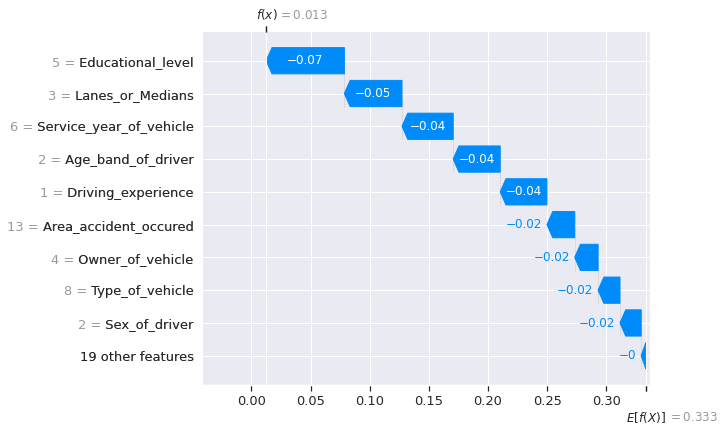

In [76]:
print(y_pred_tuned[10])
shap.initjs()
row = 10
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=shap.TreeExplainer(extree_tuned).expected_value[0], data=X_sample.iloc[row],  
                                         feature_names=X_sample.columns.tolist()))

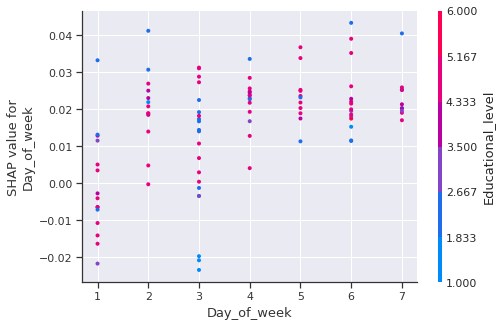

In [77]:
shap.dependence_plot('Day_of_week',shap_values[2],X_sample)

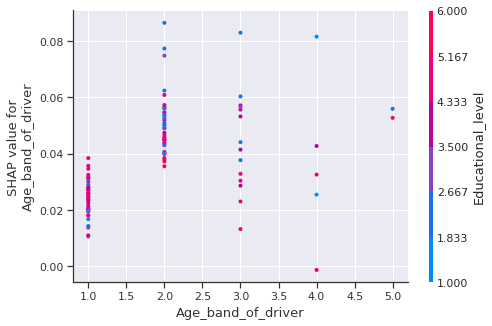

In [78]:
shap.dependence_plot('Age_band_of_driver',shap_values[2],X_sample)

3


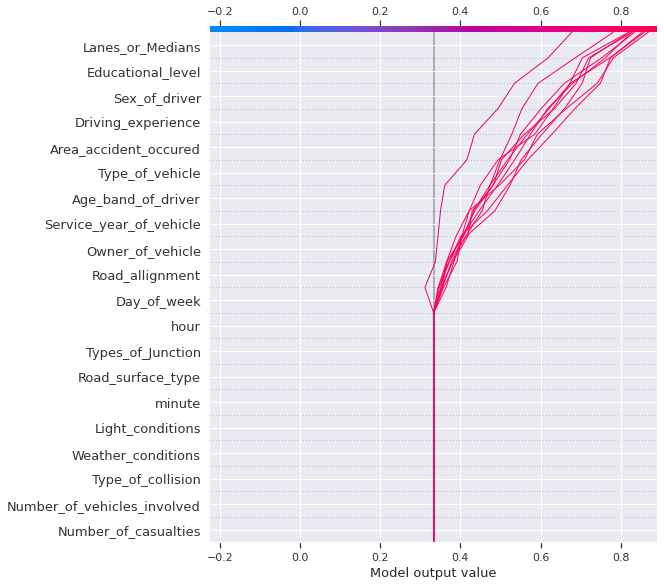

In [79]:
print(y_pred_tuned[10])
shap.decision_plot(shap.TreeExplainer(extree_tuned).expected_value[0], 
                   shap_values[2][:10], 
                   feature_names=X_sample.columns.tolist())